<div class="clearfix" style="padding: 10px; padding-left: 0px">
<a href="https://www.unicamp.br/"><img src="http://www.fee.unicamp.br/sites/all/themes/theme537/images/unicamp.png" width="100px" style="display: inline-block; margin-top: 5px;"></a>
<a href="https://www.fee.unicamp.br/"><img src="http://www.fee.unicamp.br/sites/default/files/imagens/logo_feec_50anos_juntos.png" width="150px" class="pull-right" style="display: inline-block; margin: 0px;"></a>
</div>

## IE325Z - Introdução à Confiabilidade de Materiais e Dispositivos
## Lista 1 - Exercício 6

<br>

|Alunos   	|RA   	|e-mail   	|
|:-:	|:-:	|:-:	|
|Patricia Henriques Nallin  	|103717   	|patricia.nallin@gmail.com   	| 
|Mauricio Martins Donatti  	|092374   	|mmdonatti@gmail.com   	| 



|Professor     	|e-mail   	|
|:-:	|:-:	|
|Prof. Roberto Lacerda de Orio | orio@dsif.fee.unicamp.br |

### Instruções de Uso

Para rodar um trecho de código:

1. Clique para selecionar a célula
2. Aperte `SHIFT+ENTER` no teclado ou clique no botão (<button class='fa fa-play icon-play btn btn-xs btn-default'></button>) na barra superior da página.

### Enunciado
<br>
<div style="text-align: justify">A solda termosônica de bolas de Au em pads de alumínio é um processo comum em chips de silício. Se estas soldas são armazenadas a altas temperaturas (150 ºC), pode-se observar mecanismos de competição: interdifusão de ambos elementos tendem a fortalecer as soldas inicialmente, mas buracos tendem a se formar e enfraquecer a 
solda para tempos mais longos. Os dados da resistência da solda em função do tempo são mostrados na tabela abaixo.</div>

|Tempo(segundos)|Resistência Mecânica da Solda: S (gm-f)|
|:-:	|:-:	|
|0E+00|20.00|
|1E+00|20.01|
|1E+01|20.03|
|1E+02|20.10|
|1E+03|20.31|
|1E+04|20.90|
|1E+05|22.16|
|2E+05|22.47|
|4E+05|22.32|
|6E+05|21.75|
|8E+05|20.94|
|1E+06|20.00|
|2E+06|14.14|
|2.2E+06|12.83|
|2.3E+06|12.17|
|2.4E+06|11.49|
|2.5E+06|10.81|
|2.6E+06|10.12|
|2.7E+06|9.43|
|2.8E+06|8.73|
|3E+06|7.32|
|4E+06|0.00|


<br><div style="text-align: justify">a) Determine a equação da degradação para as soldas.
<br>
b) Calcule o tempo para que a resistência da solda seja reduzida em 50% em relação a seu valor inicial
</div>

---

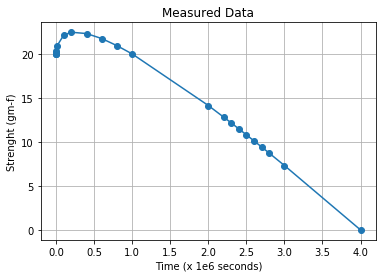

In [4]:
import matplotlib.pyplot as plt
import notebook_importer
from modules import IE325
import numpy as np


# ----- Dados
tempo_s = [0, 1, 1e1, 1e2, 1e3, 1e4, 1e5, 2e5, 4e5, 6e5, 8e5, 1e6, 2e6, 2.2e6, 2.3e6, 2.4e6, 2.5e6, 2.6e6, 2.7e6, \
2.8e6, 3e6, 4e6]

res = [20.00, 20.01, 20.03, 20.10, 20.31, 20.90, 22.16, 22.47, 22.32, 21.75, 20.94, 20.00, 14.14, 12.83, 12.17, 11.49, \
10.81,10.12,9.43,8.73,7.32,0.00]


# ----- Plot    
plt.plot(np.array(tempo_s)/1e6,res,'-o')
plt.title('Measured Data')
plt.xlabel('Time (x 1e6 seconds)')
plt.ylabel('Strenght (gm-f)')
plt.grid()
plt.show() 

##### COMPETICAO DE MECANISMOS
** *PROCEDIMENTO* **
- Encontrar a inflexão (mudança de mecanismos)
- Encontrar a lei referente ao primeiro mecanismo (de t=0 até t da inflexão)
- Encontrar a lei referente ao segundo mecanismo (de t da inflexão até o final do teste)




6


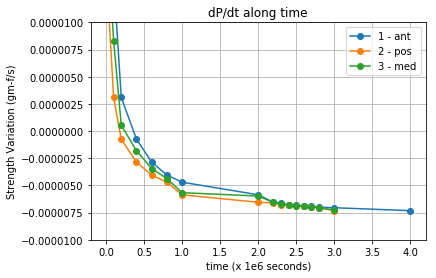

200000.0
O tempo da inflexão (mudança de mecanismo) é: 200000.0
no indice do vetor: 7


In [5]:
# Funcao que retorna as taxas de variacao da serie de dados pelos tres metodos
# e indica quando a lei deve ser iniciada e aplicada
dr_1, dt_1, dr_2, dt_2, dr_3, dt_3, index2law = IE325.StartLaw(tempo_s,res)

# ----- Plot    
plt.plot(np.array(dt_1)/1e6,dr_1,'-o',np.array(dt_2)/1e6,dr_2,'-o',np.array(dt_3)/1e6,dr_3,'-o')
plt.title('dP/dt along time')
plt.xlabel('time (x 1e6 seconds)')
plt.ylabel('Strength Variation (gm-f/s)')
plt.ylim(-1e-5,1e-5)
plt.legend(['1 - ant','2 - pos','3 - med'])
plt.grid()
plt.show()


#Encontra o indice do valor minimo na derivada (inflexão da função)
idx = np.abs(dr_3).argmin()
t_min = dt_3[idx]

idx_t = np.where(np.array(tempo_s) >= t_min)[0][0]

print(tempo_s[idx_t])

print("O tempo da inflexão (mudança de mecanismo) é: " + str(tempo_s[idx_t]) + "\nno indice do vetor: " + str(idx_t))

### Primeira Parte - Mecanismo Crescente
*Até o sétimo elemento da tabela*

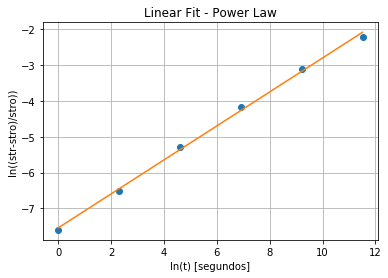

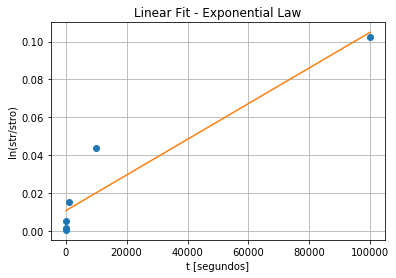

In [11]:
#PRIMEIRA PARTE (MECANISMO CRESCENTE)
PL1 = IE325.PowerLaw(tempo_s[:idx_t],res[:idx_t])
EL1 = IE325.ExponentialLaw(tempo_s[:idx_t],res[:idx_t])

# ----- Dados linearizados
xlin,ylin = PL1.LinearData()
xlin2,ylin2 = EL1.LinearData() 

# ----- Plot Linear Fit Potencia
plt.plot(xlin,ylin,'o', xlin, PL1.LinearFit())
plt.title('Linear Fit - Power Law')
plt.xlabel('ln(t) [segundos]')
plt.ylabel('ln((str-stro)/stro))')
plt.grid()
fig = plt.gcf()
plt.show() 

# ----- Plot Linear Fit Exponencial
plt.plot(xlin2,ylin2,'o', xlin2, EL1.LinearFit())
plt.title('Linear Fit - Exponential Law')
plt.xlabel('t [segundos]')
plt.ylabel('ln(str/stro)')
plt.grid()
fig = plt.gcf()
plt.show() 

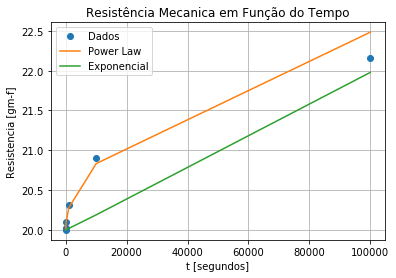

Equação de regimento - Power Law:
Str(gm-f) = 20.0 * (1 + 5.286e-04 * t^4.741e-01)
Str(gm-f) = 20.0 + 1.057e-02 * t^4.741e-01


In [4]:
# --------------------------------------------------------
# SERIE ORIGINAL DE DADOS
# --------------------------------------------------------    
    
# ----- Plot    
plt.plot(tempo_s[:idx_t],res[:idx_t],'o', tempo_s[:idx_t], PL1.Find_S(tempo_s[:idx_t]), tempo_s[:idx_t], EL1.Find_S(tempo_s[:idx_t]))
plt.title('Resistência Mecanica em Função do Tempo')
plt.legend(['Dados','Power Law','Exponencial'])
plt.xlabel('t [segundos]')
plt.ylabel('Resistencia [gm-f]')
plt.grid()
fig = plt.gcf()
plt.show()

print("Equação de regimento - Power Law:")
print("Str(gm-f) = " + PL1.LawComplete())
print("Str(gm-f) = " + PL1.LawSimple())

Pelo gráfico anterior, opta-se pela **LEI DE POTÊNCIA** para descrever a primeira parte do problema pois é a que mais se aproxima da série de dados da tabela.

### Segunda Parte - Mecanismo Decrescente
*A partir do sétimo elemento da tabela*

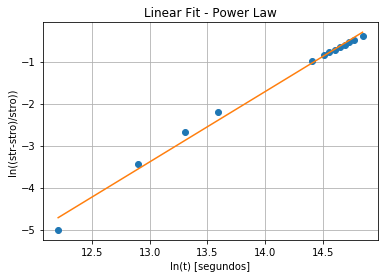

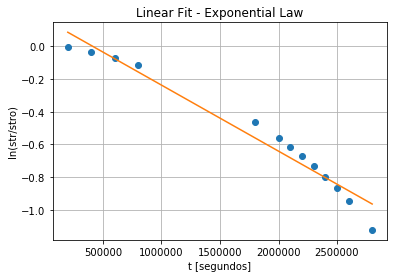

In [12]:
#SEGUNDA PARTE (DECRESCENTE)
PL2 = IE325.PowerLaw(tempo_s[idx_t:-1],res[idx_t:-1],tempo_s[idx_t])
EL2 = IE325.ExponentialLaw(tempo_s[idx_t:-1],res[idx_t:-1],tempo_s[idx_t])

# ----- Dados linearizados
xlin,ylin = PL2.LinearData()
xlin2,ylin2 = EL2.LinearData() 

# ----- Plot    
plt.plot(xlin,ylin,'o', xlin, PL2.LinearFit())
plt.title('Linear Fit - Power Law')
plt.xlabel('ln(t) [segundos]')
plt.ylabel('ln((str-stro)/stro))')
plt.grid()
plt.show() 

# ----- Plot    
plt.plot(xlin2,ylin2,'o', xlin2, EL2.LinearFit())
plt.title('Linear Fit - Exponential Law')
plt.xlabel('t [segundos]')
plt.ylabel('ln(str/stro)')
plt.grid()
plt.show() 

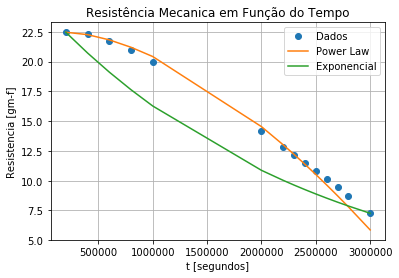

Power Law - Equação de regimento, para t >= 200000.0 s:

Str(gm-f) = 22.47 * (1 - 1.209e-11 * (t - 200000.0)^1.673e+00)
Str(gm-f) = 22.47 - 2.717e-10 * (t - 200000.0)^1.673e+00)


In [6]:
# --------------------------------------------------------
# SERIE ORIGINAL DE DADOS
# --------------------------------------------------------    
    
# ----- Plot    
plt.plot(tempo_s[idx_t:-1],res[idx_t:-1],'o', tempo_s[idx_t:-1], PL2.Find_S(tempo_s[idx_t:-1]), tempo_s[idx_t:-1], EL2.Find_S(tempo_s[idx_t:-1]))
plt.title('Resistência Mecanica em Função do Tempo')
plt.legend(['Dados','Power Law','Exponencial'])
plt.xlabel('t [segundos]')
plt.ylabel('Resistencia [gm-f]')
plt.grid()
fig = plt.gcf()
plt.show()


print("Power Law - Equação de regimento, para t >= " + str(tempo_s[idx_t]) + " s:\n")
print("Str(gm-f) = " + PL2.LawComplete())
print("Str(gm-f) = " + PL2.LawSimple())

Pelo gráfico anterior, opta-se também pela **LEI DE POTÊNCIA** para descrever a segunda parte do problema pois é a que mais se aproxima da série de dados da tabela.

---
##### Série de Dados e Leis de Potência

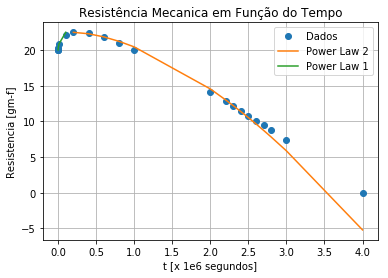

In [7]:
# ----- Plot    
plt.plot(np.array(tempo_s)/1e6,res,'o', np.array(tempo_s[idx_t:])/1e6, PL2.Find_S(tempo_s[idx_t:]), np.array(tempo_s[:idx_t])/1e6, PL1.Find_S(tempo_s[:idx_t]))
plt.title('Resistência Mecanica em Função do Tempo')
plt.legend(['Dados','Power Law 2','Power Law 1'])
plt.xlabel('t [x 1e6 segundos]')
plt.ylabel('Resistencia [gm-f]')
plt.grid()
fig = plt.gcf()
plt.show()

---

##### Resistência da solda reduzida em 50%

Utilizando a combinação de ambas PLs e resolvendo a equação não-linear, temos:

In [8]:
#Utilizando a combinação de ambas PLs e resolvendo a equação não-linear, temos:

from scipy.optimize import fsolve
func = lambda t : 0.5 - (1 + PL1.Ao * np.power(t,PL1.n))*(1 + PL2.Ao * np.power(t,PL2.n))


t_initial_guess = 2.78e+06
t_solution = fsolve(func, t_initial_guess)

print("\nO tempo para a resistência atingir 50% é: "+format(float(t_solution),'.2e') + " s (" + 
      format(float(t_solution)/3600,'.2f') + " horas ou " + format(float(t_solution)/(24*3600),'.2f') + " dias)")


O tempo para a resistência atingir 50% é: 2.68e+06 s (743.67 horas ou 30.99 dias)


---

##### Variáveis Associadas - Mecanismo Crescente (PL1)

In [9]:
print(PL1.Variables())
print(EL1.Variables())



Linear Fit Variables - Power Law:

a (slope coef) = 0.474142691821
b (intercept coef) = -7.54524175086
r_value (correlation coefficient) = 0.998912625269
std_err (standard error) = 0.0110646603448


Power Law Variables:

Ao = 0.000528619455444
n = 0.474142691821



Linear Fit Variables - Exponential Law:

a (slope coef) = 9.4278421705e-07
b (intercept coef) = 0.010697861886
r_value (correlation coefficient) = 0.947564302352
std_err (standard error) = 1.58976541496e-07

Exponential Law Variables:

Ao = 9.4278421705e-07


---

##### Variáveis Associadas - Mecanismo Decrescente (PL2)

In [10]:
print(PL2.Variables())
print(EL2.Variables())



Linear Fit Variables - Power Law:

a (slope coef) = 1.67299652504
b (intercept coef) = -25.1384083098
r_value (correlation coefficient) = 0.996059321319
std_err (standard error) = 0.0449144128288


Power Law Variables:

Ao = -1.20928311028e-11
n = 1.67299652504



Linear Fit Variables - Exponential Law:

a (slope coef) = -4.0331670617e-07
b (intercept coef) = 0.165917493191
r_value (correlation coefficient) = -0.980495502635
std_err (standard error) = 2.43757829924e-08

Exponential Law Variables:

Ao = -4.0331670617e-07
